<a href="https://colab.research.google.com/github/sujeengim/mini-ai-study/blob/main/Supervised%20Learning/Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 사이킷런 라이브러리 기반 학습 및 예측 패턴 4단계
1. 불러오기
2. 생성
3. 학습
4. 예측

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 선형 회귀

In [17]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2023)

x = []
y = []
for i in range(1,11):
    x.append(i)
    y.append(4*i+7)

print('x:', x)
print('y:', y)

x: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y: [11, 15, 19, 23, 27, 31, 35, 39, 43, 47]


In [18]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

x = np.array(x).reshape(-1,1) #x를 array로 만든후 2차원배열로 변환

print("학습 데이터 확인")
print('x:', x)
print('x.shape :', x.shape)

학습 데이터 확인
x: [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
x.shape : (10, 1)


In [19]:
# 학습
reg.fit(x,y)

print(f'기울기 및 절편 확인 coef = {reg.coef_}, {reg.coef_[0]} intercept = {reg.intercept_}')

coef_intercept = x*reg.coef_[0] + reg.intercept_

print("계산결과")
print(coef_intercept)

기울기 및 절편 확인 coef = [4.], 4.000000000000001 intercept = 6.9999999999999964
계산결과
[[11.]
 [15.]
 [19.]
 [23.]
 [27.]
 [31.]
 [35.]
 [39.]
 [43.]
 [47.]]


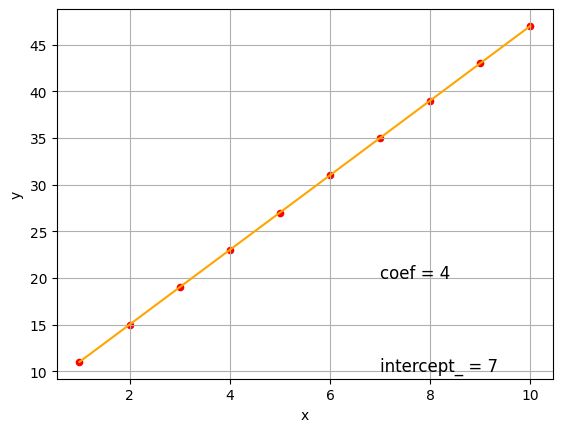

In [20]:
plt.scatter(x,y, color='r', s=20)
plt.plot(x, coef_intercept, color='orange')
plt.text(7,20, 'coef = %.0f'%reg.coef_[0], size=12)
plt.text(7,10, 'intercept_ = %.0f'%reg.intercept_, size=12)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.coef_, lr.intercept_)
# 9.5 추론해보기
p1 = lr.predict(np.array(9.5).reshape(-1,1))
print(f'추론값 : {round(p1[0])}')

[0.1] -0.4666666666666667
추론값 : 0


추론값 : [45.]


# 로지스틱 회귀
로지스틱 회귀는 시그모이드 함수를 사용하여 확률을 반환하는 알고리즘이다.

## 시그모이드 함수

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

test = np.array([-1, 0 ,1])
print(sigmoid(test))

[0.26894142 0.5        0.73105858]


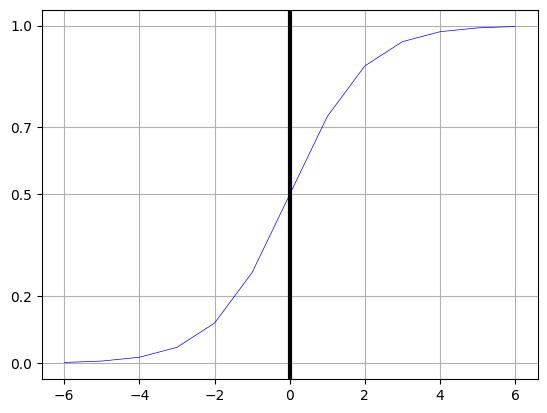

In [8]:
sigmoid_x = range(-6,7)
sigmoid_y = sigmoid(np.array(sigmoid_x))

# 선그래프
plt.plot(sigmoid_x, sigmoid_y, color='blue', linewidth=0.5)
plt.rcParams['axes.grid'] = True #모눈종이 설정
plt.axvline(x=0, color='black', linewidth=3)# 선굵기
plt.yticks([0, 0.2, 0.5, 0.7, 1]) #y축 범위 설정
plt.show()

## 로지스틱 회귀 함수

In [9]:
# 학습데이터
x_train = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
y_train = [0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]

# 검증 위한 데이터
x_test = [0,1,2,18,19]
y_test = [0,0,0,1,1]

x_train = np.array(x_train).reshape([-1,1])
y_train = np.array(y_train)
x_test = np.array(x_test).reshape([-1,1])
y_test = np.array(y_test)

print(x_train)
print(y_train)

[[ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]


In [12]:
from sklearn.linear_model import LogisticRegression

logi_reg = LogisticRegression()
logi_reg.fit(x_train, y_train)

print('W: ', logi_reg.coef_[0][0])
print('B:', logi_reg.intercept_[0])

W:  1.1938873107010743
B: -11.341767914577835


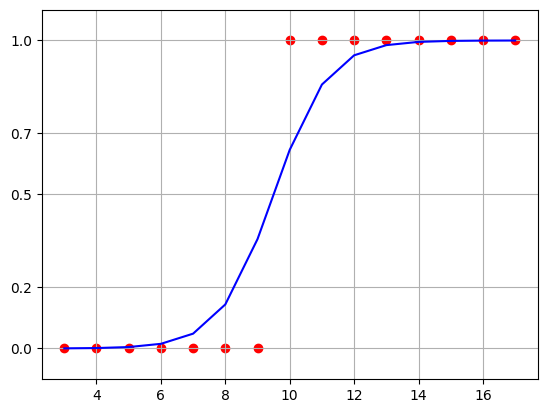

In [13]:
odd = []
for i in x_train:
    odd.append((logi_reg.coef_ * i) + logi_reg.intercept_)

sigmoid_y = sigmoid(np.array(odd))
sigmoid_y = sigmoid_y.reshape(-1,1)

plt.scatter(x_train, y_train, color='red')
plt.plot(np.array(x_train), sigmoid_y, color='blue')
plt.rcParams['axes.grid'] = True
plt.yticks([0, 0.2, 0.5, 0.7, 1])
plt.ylim([-0.1, 1.1]) #y축 범위[Ymin, Ymax]
plt.show()

In [16]:
p2 = logi_reg.predict(np.array(9.5).reshape(-1,1))
print(p2)

[1]


# 의사결정 나무

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/study/aice/실습/자료/국민건강보험공단_건강검진정보_20211229.CSV',
                 encoding='cp949')

df.columns
# sample_df = df[['신장(5cm 단위)', '성별코드', '체중(5kg 단위)', '음주여부']]
# sample_df[:10]

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'],
      dtype='object')

In [30]:
sample_df = df[['신장(5Cm단위)', '성별코드', '체중(5Kg 단위)', '음주여부']]
sample_df[:10]

,신장(5Cm단위),성별코드,체중(5Kg 단위),음주여부
0,165,1,60,0.0
1,150,2,65,0.0
2,155,2,55,0.0
3,160,1,70,0.0
4,155,2,50,0.0
5,185,1,85,1.0
6,165,1,80,1.0
7,160,1,65,0.0
8,150,2,50,0.0
9,150,2,45,0.0


In [31]:
print('Info 정보확인')
sample_df.info()

Info 정보확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   신장(5Cm단위)   1000000 non-null  int64  
 1   성별코드        1000000 non-null  int64  
 2   체중(5Kg 단위)  1000000 non-null  int64  
 3   음주여부        999804 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 30.5 MB


In [32]:
sample = sample_df.dropna() # 결측치 포함 행 삭제
print("Drop 후 Info 정보확인")
sample.info()

Drop 후 Info 정보확인
<class 'pandas.core.frame.DataFrame'>
Index: 999804 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   신장(5Cm단위)   999804 non-null  int64  
 1   성별코드        999804 non-null  int64  
 2   체중(5Kg 단위)  999804 non-null  int64  
 3   음주여부        999804 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 38.1 MB


In [34]:
sample = sample.astype('str') #type을 object로 변경
y = sample.음주여부
print(y)
x = sample.drop('음주여부', axis=1)
print(y.value_counts())


0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
999995    0.0
999996    1.0
999997    1.0
999998    0.0
999999    0.0
Name: 음주여부, Length: 999804, dtype: object
음주여부
1.0    584685
0.0    415119
Name: count, dtype: int64


In [37]:
print(x)

       신장(5Cm단위) 성별코드 체중(5Kg 단위)
0            165    1         60
1            150    2         65
2            155    2         55
3            160    1         70
4            155    2         50
...          ...  ...        ...
999995       145    2         55
999996       160    2         55
999997       175    1         70
999998       160    2         70
999999       160    1         55

[999804 rows x 3 columns]


In [36]:
x_train, x_valid, y_train, y_valid = train_test_split(
    x, y,
    test_size=0.2,
    shuffle=True,
    random_state=34
)

In [40]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1001, max_depth=2)
dt15 = DecisionTreeClassifier(random_state=1001, max_depth=15)
dt30 = DecisionTreeClassifier(random_state=1001, max_depth=30)

dt_model = dt.fit(x_train, y_train)
dt15_model = dt15.fit(x_train, y_train)
dt30_model = dt30.fit(x_train, y_train)

print('dt정확도', dt_model.score(x_train, y_train))
print('dt검증 정확도', dt_model.score(x_valid, y_valid))
print('dt15정확도', dt15_model.score(x_train, y_train))
print('dt15검증 정확도', dt15_model.score(x_valid, y_valid))
print('dt30정확도', dt30_model.score(x_train, y_train))
print('dt30검증 정확도', dt30_model.score(x_valid, y_valid))

dt정확도 0.6622549675373792
dt검증 정확도 0.6618390586164302
dt15정확도 0.6758938941767322
dt15검증 정확도 0.6775171158375883
dt30정확도 0.6758938941767322
dt30검증 정확도 0.6775171158375883


In [42]:
dt1 = DecisionTreeClassifier(random_state=1001, max_depth=1, max_features=1)
'''
max_depth=1: 나무의 깊이를 딱 한 단계만 쌓습니다. (이를 **Stump(그루터기)**라고 부릅니다.)
max_features=1: 그 한 번의 질문을 던질 때도 전체 컬럼 중 랜덤하게 뽑힌 딱 1개만 검토합니다.
'''
dt2 = DecisionTreeClassifier(random_state=1001, max_depth=1, max_features=2)
dt3 = DecisionTreeClassifier(random_state=1001, max_depth=1, max_features=3)

dt1_model = dt1.fit(x_train, y_train)
dt2_model = dt2.fit(x_train, y_train)
dt3_model = dt3.fit(x_train, y_train)

print('dt1정확도', dt1_model.score(x_train, y_train))
print('dt1검증 정확도', dt1_model.score(x_valid, y_valid))
print('dt2정확도', dt2_model.score(x_train, y_train))
print('dt2검증 정확도', dt2_model.score(x_valid, y_valid))
print('dt3정확도', dt3_model.score(x_train, y_train))
print('dt3검증 정확도', dt3_model.score(x_valid, y_valid))

dt1정확도 0.6711367105794512
dt1검증 정확도 0.6731512644965768
dt2정확도 0.6622549675373792
dt2검증 정확도 0.6618390586164302
dt3정확도 0.6622549675373792
dt3검증 정확도 0.6618390586164302


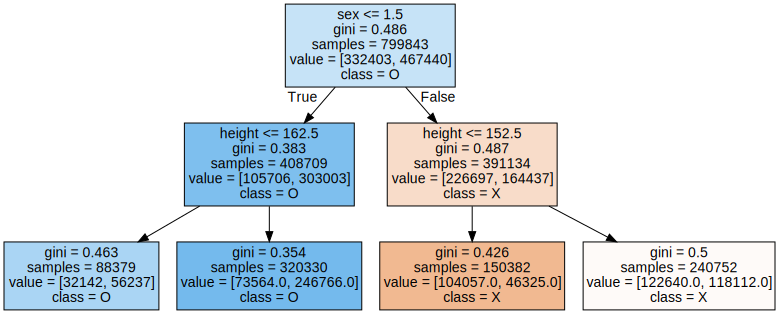

In [39]:
import matplotlib.pyplot as plt

!pip install graphviz
import graphviz
from sklearn.tree import export_graphviz

tree_graph = graphviz.Source(export_graphviz(dt_model,
                                             class_names=["X", "O"],
                                             feature_names=['height', 'sex', 'weight'],
                                             impurity=True,
                                             filled=True
                            ))
tree_graph


# 앙상블

## 랜덤 포레스트
배깅 모델이다.

In [43]:
!pip install tensorflow
from tensorflow.keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data()
print('변경 전: ', x_train.shape)

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
print('변경 후: ', x_train.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
변경 전:  (60000, 28, 28)
변경 후:  (60000, 784)


In [44]:
#의사결정나무 모델링
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier(random_state=0)
dct.fit(x_train, y_train)

acc_train_dct = dct.score(x_train, y_train)
acc_test_dct = dct.score(x_test, y_test)

print(f'학습 결과 = {acc_train_dct}, 검증 결과 = {acc_test_dct}')

학습 결과 = 1.0, 검증 결과 = 0.8781


In [46]:
#랜덤 포레스트 모델링
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train, y_train)

acc_train_rfc = rfc.score(x_train, y_train)
acc_test_rfc = rfc.score(x_test, y_test)

print(f'학습 결과 = {acc_train_rfc}, 검증 결과 = {acc_test_rfc}')

학습 결과 = 1.0, 검증 결과 = 0.9705


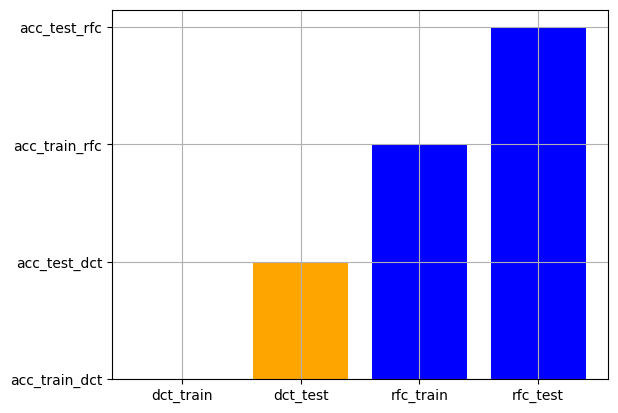

In [48]:
import matplotlib.pyplot as plt

acc_list_x = ['dct_train', 'dct_test', 'rfc_train', 'rfc_test']
acc_list_y = ['acc_train_dct', 'acc_test_dct', 'acc_train_rfc', 'acc_test_rfc']

colors = ['orange', 'orange', 'blue', 'blue']
plt.bar(acc_list_x, acc_list_y, color=colors)
plt.show()

# 그래디언트 부스팅
부스팅 모델이다.

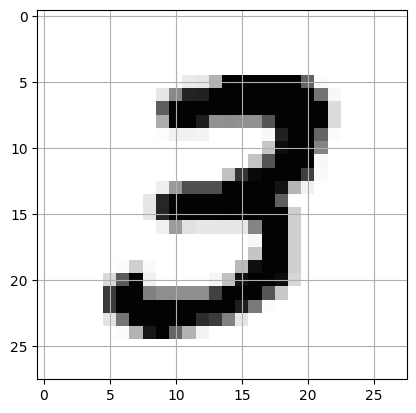

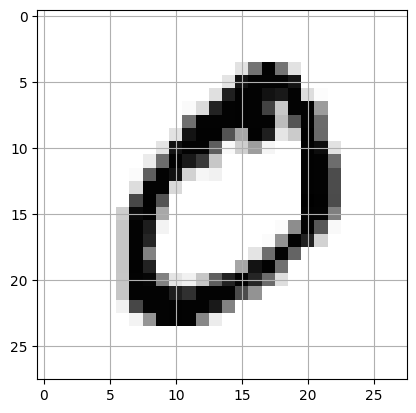

In [50]:
from tensorflow.keras.datasets.mnist import load_data
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = load_data()

x_train = x_train[:2000]
y_train = y_train[:2000]
x_test = x_test[:2000]
y_test = y_test[:2000]

plt.imshow(x_train[7], cmap='Greys')
plt.show()

plt.imshow(x_train[1], cmap='Greys')
plt.show()

In [51]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

dct = DecisionTreeClassifier(random_state=0)
dct.fit(x_train, y_train)
acc_train_dct = dct.score(x_train, y_train)
acc_test_dct = dct.score(x_test, y_test)

rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train, y_train)
acc_train_rfc = rfc.score(x_train, y_train)
acc_test_rfc = rfc.score(x_test, y_test)

gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(x_train, y_train)
acc_train_gbc = gbc.score(x_train, y_train)
acc_test_gbc = gbc.score(x_test, y_test)

print(f'의사결정나무: train_acc = {round(acc_train_dct,3)}, test_acc = {round(acc_test_dct,3)}')
print(f'랜덤포레스트: train_acc = {round(acc_train_rfc,3)}, test_acc = {round(acc_test_rfc,3)}')
print(f'그래디언트부스팅: train_acc = {round(acc_train_gbc,3)}, test_acc = {round(acc_test_gbc,3)}')

In [ ]:
import matplotlib.pyplot as plt

acc_list_x = ['dct_train', 'dct_test', 'rfc_train', 'rfc_test', 'gbc_train', 'gbc_test']
acc_list_y = ['acc_train_dct', 'acc_test_dct','acc_train_rfc', 'acc_test_rfc', 'acc_train_gbc', 'acc_test_gbc']
colors = ['orange','orange','blue','blue','red','red']
plt.bar(acc_list_x, acc_list_y, color=colors)
plt.ylim([0.8, 1.0])
plt.show()